# Final Project Diagram - MeetUp Streaming

In [1]:
reset -fs

In [2]:
from graphviz import Digraph

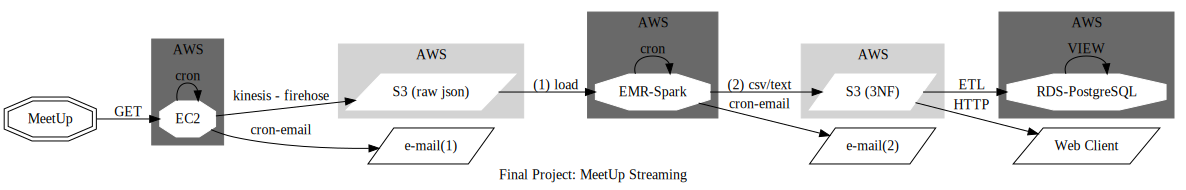

In [3]:
g = Digraph(comment='Data Model')
g.graph_attr['rankdir'] = 'LR'
g.body.append(r'label = "Final Project: MeetUp Streaming"')

aws = Digraph('cluster_0')
aws.body.append('style=filled')
aws.body.append('color=dimgray')
aws.node_attr.update(style='filled', color='white')
aws.body.append('label = "AWS"')
aws.node('EC2', shape='octagon')

emr = Digraph('cluster_1')
emr.body.append('style=filled')
emr.body.append('color=dimgray')
emr.node_attr.update(style='filled', color='white')
emr.body.append('label = "AWS"')
emr.node('EMR-Spark', shape='octagon')

rds = Digraph('cluster_2')
rds.body.append('style=filled')
rds.body.append('color=dimgray')
rds.node_attr.update(style='filled', color='white')
rds.body.append('label = "AWS"')
rds.node('RDS-PostgreSQL', shape='octagon')

s3_raw = Digraph('cluster_3')
s3_raw.body.append('style=filled')
s3_raw.body.append('color=lightgrey')
s3_raw.node_attr.update(style='filled', color='white')
s3_raw.body.append('label = "AWS"')
s3_raw.node('S3 (raw json)', shape='octagon')

s3_clean = Digraph('cluster_4')
s3_clean.body.append('style=filled')
s3_clean.body.append('color=lightgrey')
s3_clean.node_attr.update(style='filled', color='white')
s3_clean.body.append('label = "AWS"')
s3_clean.node('S3 (3NF)', shape='octagon')


g.subgraph(aws)
g.subgraph(emr)
g.subgraph(rds)
g.subgraph(s3_raw)
g.subgraph(s3_clean)

g.node('MeetUp', shape='doubleoctagon')
g.node('S3 (raw json)', shape='parallelogram')
g.node('S3 (3NF)', shape='parallelogram')
g.node('Web Client', shape='parallelogram')
g.node('e-mail(1)', shape='parallelogram')
g.node('e-mail(2)', shape='parallelogram')
g.edge('EC2', 'EC2', 'cron')
g.edge('EMR-Spark', 'EMR-Spark', 'cron')
g.edge('EC2', 'e-mail(1)', 'cron-email')
g.edge('EMR-Spark', 'e-mail(2)', 'cron-email')
g.edge('MeetUp', 'EC2', 'GET')
g.edge('EC2', 'S3 (raw json)', 'kinesis - firehose')
g.edge('S3 (3NF)', 'Web Client', 'HTTP')
g.edge('S3 (raw json)', 'EMR-Spark', '(1) load')
g.edge('EMR-Spark', 'S3 (3NF)', '(2) csv/text')
g.edge('S3 (3NF)', 'RDS-PostgreSQL', 'ETL')
g.edge('RDS-PostgreSQL', 'RDS-PostgreSQL', 'VIEW')

g

In [4]:
g.save("final-project-diagram.gv")

'final-project-diagram.gv'

In [5]:
!dot -Tpng "final-project-diagram.gv" > "final-project-diagram.png"

>Color guide: http://www.graphviz.org/doc/info/colors.html

>Export guide: http://www.graphviz.org/content/how-go-graphiz-png-what-am-i-missing-here